In [ ]:
# TERMS IN MACHINE LEARNING(ML)
# 1.Collection : data used for training,validating and testing the machine learning model

# 2.Feature(x): independent variable-input-we 

# 3.Target(y) : dependent variable -output -we wnat to predict-example : predicting number of bedrooms 

# 4.Training data : subset of dataset used to train the model

# 5.Testing data : subset of dataset to validate the training model

# 6.Model : mathematical representation of relationship between feature and target 

# 7.Supervised learning (sl) : training the model based on labeled data ((or)) model learns from known /labeled data

# 8.Regression : it is a method to predict or derive the continuous value from a model-comppletely supervised learning

# 9.Overfitting : when a model learns from trainig data too well,includes noise-perform poorly new data

# 10.Underfitting : model is too simple and doesnt capture pattern in data

## CATEGORIES IN MACHINE LEARNING : 
# 1.Supervised learning : moodel learns from labeled data -I/O pairs 
# Example : linear regression,decision trees ,random forest ,support vector machines(svm)
# Best use case so far : house price prediction based on previous/historical data

# 2.Unsupervised learning : model finds new pattern in unlabelled data without predefined data/labels 
# Example : clustering (K means),PCA
# Use case : customer segmentation in marketing

# 3. Reinforcement learning : model learns by interacting with environment receiving the rerewards or penalties 
# Example : Deep learning , AlphaGo,...
# Best use case : self car driving vehicles, Self learning AI bots ,SLAM


In [ ]:
# example : predicting the house price - random dataset- generated
# steps : 1.generate a random dataset  2.train a ML model - linear regression  3.evaluate the model  4.make a prediction

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# step1 : generate a random dataset
np.random.seed(42) # used to set same sequence of values for the random package 
numsamples=100
size=np.random.randint(800,5000,numsamples) # create 100 samples from 800 to 5000
bedrooms=np.random.randint(1,6,numsamples)  
washrooms=np.random.randint(1,8,numsamples)
localityscore=np.random.randint(1,10,numsamples)

# generate house prices with randomness
houseprices=(size*3000)+(bedrooms*50000)+(washrooms*30000)+(localityscore*70000)+np.random.randint(-50000,50000,numsamples)

# creat a dataframe 
df=pd.DataFrame(
    {
        'size':size,
        'bedrooms':bedrooms,
        'washrooms':washrooms,
        'localityscore':localityscore,
        'price':houseprices
    }
)

In [4]:
df

,size,bedrooms,washrooms,localityscore,price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [ ]:
# step2 : linear regression - train a ML model 
# package(installation) requirements:
# sklearn

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
x=df[['size','bedrooms','washrooms','localityscore']]
y=df['price']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
# step3 - evaluating the model 
# package requirememt --sklearn.metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred=model.predict(x_test)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE) # root mean square error
print(f'mean absolute error :{MAE}')
print(f'mean squared error :{MSE}')
print(f'root mean square error :{RMSE}')

mean absolute error :25385.345481365173
mean squared error :796791448.432393
root mean square error :28227.49454755758


In [15]:
# step4 : make prediction 
newhouse=np.array([[500,1,1,1]])
predictedprice=model.predict(newhouse)
print(f'the predicted price of new house is{predictedprice[0]}')

the predicted price of new house is1669544.193144407


C:\Users\santh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
x_sorted=np.sort(x,axis=0)
ypred=model.predict(x_sorted)

C:\Users\santh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\santh\AppData\Local\Temp\ipykernel_20544\1759298690.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


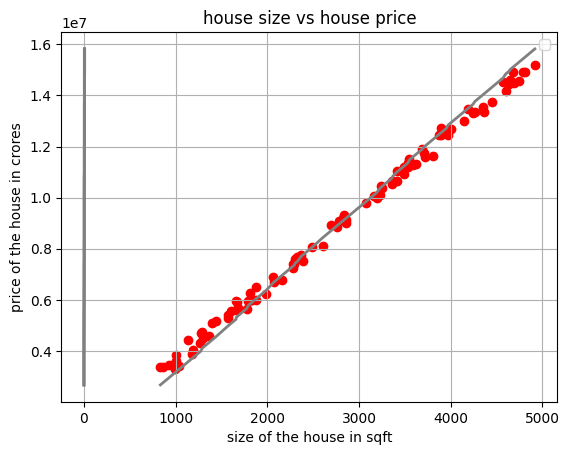

In [30]:
plt.scatter(df['size'],df['price'],color='red')
plt.plot(x_sorted,ypred,color='grey',linewidth=2)
plt.xlabel('size of the house in sqft')
plt.ylabel('price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('house size vs house price')
plt.show()

C:\Users\santh\AppData\Local\Temp\ipykernel_20544\2153543660.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


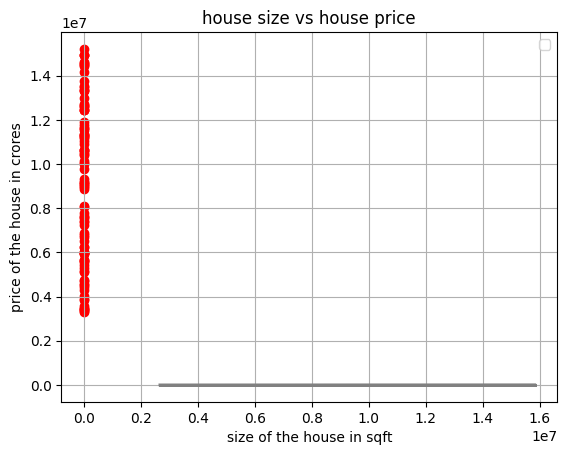

In [31]:
plt.scatter(df['size'],df['price'],color='red')
plt.plot(ypred,x_sorted,color='grey',linewidth=2)
plt.xlabel('size of the house in sqft')
plt.ylabel('price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('house size vs house price')
plt.show()